Kannan: This notebook is for stitching various features generated from featuer engineering step (both numerical and textual features) and run feature significance analysis and select K-best features to feed to ML model.

In [152]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [153]:
#supress outliers
supress_outiers=True

### Reading data & Stitching features

In [154]:
#File we received from professors
inputFile = '../data/input/OnlineNewsPopularity.csv' 
df = pd.read_csv(inputFile)
df.columns = df.columns.str.replace(' ','')
df.head()

,Id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,shares
0,1,http://mashable.com/2014/09/01/americans-held-...,10,261,0.661355,1.0,0.787500,7,3,1,1,4.873563,7,0,0,0,0,0,1,1100
1,2,http://mashable.com/2014/09/01/apple-visa-mast...,7,1791,0.370242,1.0,0.535038,74,3,50,0,4.554439,8,0,0,0,0,0,0,1100
2,3,http://mashable.com/2014/09/01/aussie-football...,7,503,0.524291,1.0,0.704918,3,3,1,0,5.003976,5,0,0,0,0,0,1,1000
3,4,http://mashable.com/2014/09/01/australia-gover...,10,526,0.536204,1.0,0.654867,17,1,1,0,4.998099,9,0,0,0,0,0,1,822
4,5,http://mashable.com/2014/09/01/australia-jane-...,13,237,0.619048,1.0,0.807143,5,3,1,0,5.046414,9,0,0,0,0,0,1,841


In [155]:
#List of feature generated files
filepath='../data/output/'
files=[
    '2_Day_of_Week_Extraction.xlsx',
    '2_d2v_keywords.xlsx',
    '2_d2v_NER_list.xlsx',
    '2_NER_Type_Count.xlsx',
    '2_Sentiment_Polarity_Subjectivity.xlsx'
    
]

In [156]:
%%time
#Merging feature files
for f in files:
    df_tmp=pd.read_excel(filepath+f)
    df=pd.merge(df,df_tmp,how='left',on='Id')
    print('file:',f,'\tColumns:',len(df_tmp.columns))

file: 2_Day_of_Week_Extraction.xlsx 	Columns: 9
file: 2_d2v_keywords.xlsx 	Columns: 111
file: 2_d2v_NER_list.xlsx 	Columns: 111
file: 2_NER_Type_Count.xlsx 	Columns: 19
file: 2_Sentiment_Polarity_Subjectivity.xlsx 	Columns: 5
Wall time: 44.7 s


In [157]:
#Writing feature columns to a file
f=open(filepath+'2_feature_columns.txt','w')
for c in df.columns:
    f.write("'"+c+"',")
f.close()

In [158]:
#Selecting columns (excluding vector columns; keeping only pca columns instead)
df_raw=df.copy()
selected_columns=['n_tokens_title','n_tokens_content','n_unique_tokens','n_non_stop_words','n_non_stop_unique_tokens','num_hrefs','num_self_hrefs','num_imgs','num_videos','average_token_length','num_keywords','data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world','is__Monday','is__Tuesday','is__Wednesday','is__Thursday','is__Friday','is__Saturday','is__Sunday','is_Weekend','keywords_pca_0','keywords_pca_1','keywords_pca_2','keywords_pca_3','keywords_pca_4','keywords_pca_5','keywords_pca_6','keywords_pca_7','keywords_pca_8','keywords_pca_9','NER_list_pca_0','NER_list_pca_1','NER_list_pca_2','NER_list_pca_3','NER_list_pca_4','NER_list_pca_5','NER_list_pca_6','NER_list_pca_7','NER_list_pca_8','NER_list_pca_9','NER_GPE','NER_DATE','NER_CARDINAL','NER_NORP','NER_PERSON','NER_TIME','NER_ORG','NER_WORK_OF_ART','NER_QUANTITY','NER_EVENT','NER_ORDINAL','NER_MONEY','NER_FAC','NER_PRODUCT','NER_LAW','NER_PERCENT','NER_LOC','NER_LANGUAGE','polarity_title','subjectivity_title','polarity_content','subjectivity_content','shares']
df=df[selected_columns]
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,NER_PRODUCT,NER_LAW,NER_PERCENT,NER_LOC,NER_LANGUAGE,polarity_title,subjectivity_title,polarity_content,subjectivity_content,shares
0,10,261,0.661355,1.0,0.787500,7,3,1,1,4.873563,...,0,0,0,0,0,0.000,0.00,0.013542,0.390972,1100
1,7,1791,0.370242,1.0,0.535038,74,3,50,0,4.554439,...,0,0,0,0,0,0.000,0.00,-0.171848,0.618573,1100
2,7,503,0.524291,1.0,0.704918,3,3,1,0,5.003976,...,0,0,0,0,0,-0.075,0.05,0.003831,0.348095,1000
3,10,526,0.536204,1.0,0.654867,17,1,1,0,4.998099,...,1,1,0,0,0,0.000,0.00,0.124162,0.378684,822
4,13,237,0.619048,1.0,0.807143,5,3,1,0,5.046414,...,0,0,0,0,0,0.000,0.75,0.070928,0.486269,841


In [159]:
print(df.shape)

(7795, 68)


In [160]:
#Removing outlier rows
if supress_outiers:
    df=df[df.shares<=25000]
    print(df.shape)

(7689, 68)


In [161]:
#selection input features and target column
X=df.drop('shares',1) #Feature matrix
y=df['shares'] #target column

In [162]:
print(X.shape)
print(y.shape)

(7689, 67)
(7689,)


## #1 Filter method (correlation)

In this method, we filter and take only the subset of the relevant features. The filtering here is done using correlation matrix and it is most commonly done using "Pearson correlation".

Pearson correlation heatmap is plotted to see the correlation of independent variables with the output variable (Shares). 

The correlation coefficient has values between -1 to 1
- A value closer to 0 implies weaker correlation (exact 0 implying 'no correlation')
- A value closer to 1 implies stronger 'positive' correlation
- A value closer to -1 implies stronger 'negative' correlation

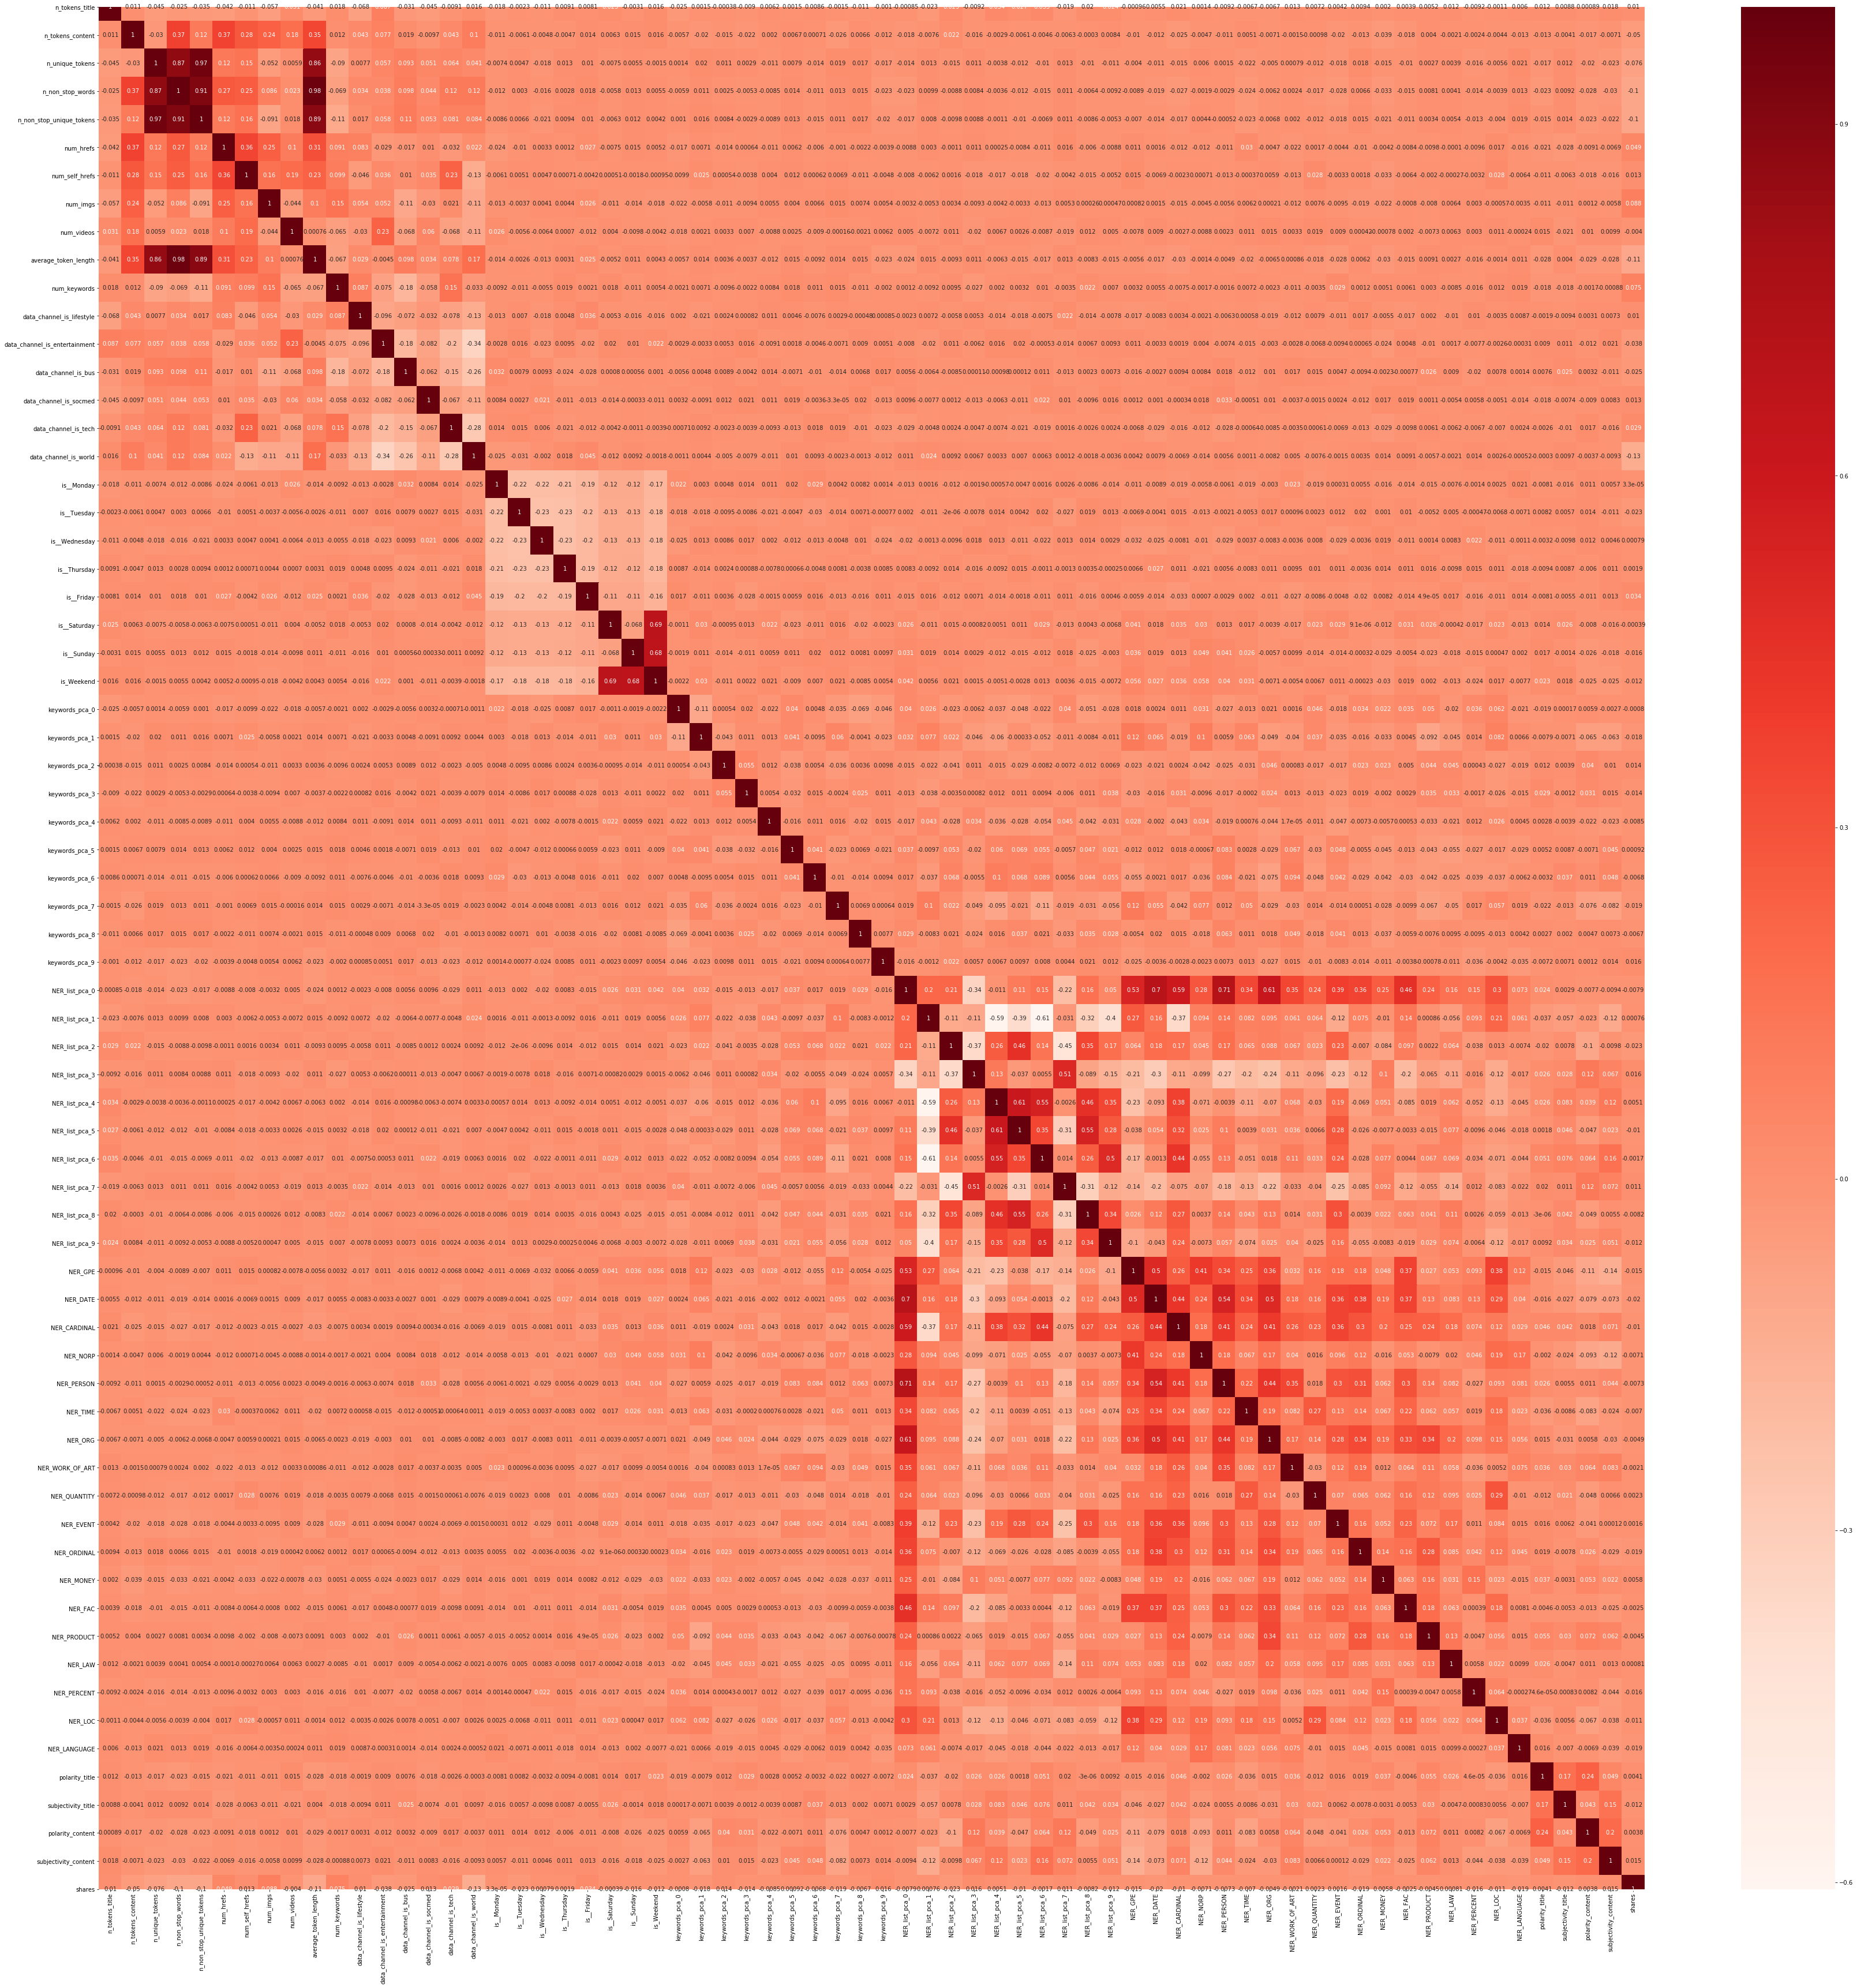

In [163]:
#Using Pearson Correlation
plt.figure(figsize=(60,60))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [164]:
#Correlation with output variable
cor_target = abs(cor["shares"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.05] #threshold +/-5%
relevant_features

n_unique_tokens             0.076007
n_non_stop_words            0.103338
n_non_stop_unique_tokens    0.100114
num_imgs                    0.088225
average_token_length        0.109009
num_keywords                0.074557
data_channel_is_world       0.132564
shares                      1.000000
Name: shares, dtype: float64

In [165]:
#Checking correlation between two features. This is to keep only uncorrelated features. out of two highly correlated features, one is enough.
print(df[["n_unique_tokens","n_non_stop_words"]].corr())

                  n_unique_tokens  n_non_stop_words
n_unique_tokens          1.000000          0.866866
n_non_stop_words         0.866866          1.000000


## #2: Wrapper Method

A wrapper method uses a ML algorithm and its performance as evaluation criteria. we feed the features to the ML algorithm and based on the model performance we add/remove the features. This is an iterative and computationally expensive process but it is more accurate than the filter method.

Wrapper methods
- Backward Elimination
- Forward Selection
- Bidirectional Elimination
- Recursive Feature Elimination (RFE)

We implemented Backward Elimination and RFE here.

In [166]:
#Backward Elimination
#The performance metric used here to evaluate feature performance is pvalue. 
#If the pvalue is above 0.05 then we remove the feature, else we keep it.

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit() #Ordinary Least Square
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.5): #threshold
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['n_tokens_title', 'n_unique_tokens', 'n_non_stop_words', 'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'is__Monday', 'is__Tuesday', 'is__Wednesday', 'is__Thursday', 'is__Friday', 'is__Saturday', 'is_Weekend', 'keywords_pca_1', 'keywords_pca_2', 'keywords_pca_3', 'keywords_pca_4', 'keywords_pca_6', 'keywords_pca_7', 'keywords_pca_9', 'NER_list_pca_0', 'NER_list_pca_1', 'NER_list_pca_2', 'NER_list_pca_4', 'NER_list_pca_9', 'NER_DATE', 'NER_ORDINAL', 'NER_PERCENT', 'NER_LANGUAGE']


In [167]:
#Recursive feature elimination
model = LinearRegression()

#finding no of features that gives best output
nof_list=np.arange(1,len(X.columns))            
high_score=0
#Variable to store the optimum features
nof=0
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 12
Score with 12 features: 0.040621


In [168]:
cols = list(X.columns)
#Initializing RFE model
rfe = RFE(model, nof)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'average_token_length', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'is__Friday', 'subjectivity_content'],
      dtype='object')


## #3 Embedded method

Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.

Here we will do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

In [169]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 69.735110

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



Best score using built-in LassoCV: 0.039580


In [170]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 17 variables and eliminated the other 50 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

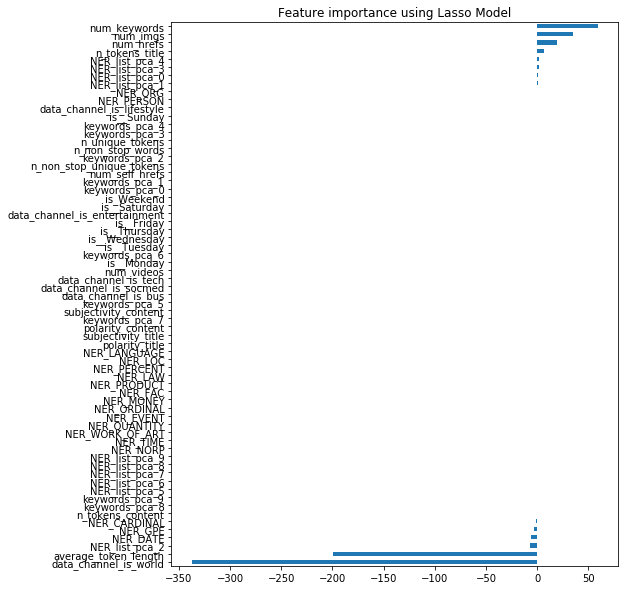

In [171]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [172]:
selected_features_BE

['n_tokens_title',
 'n_unique_tokens',
 'n_non_stop_words',
 'num_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'is__Monday',
 'is__Tuesday',
 'is__Wednesday',
 'is__Thursday',
 'is__Friday',
 'is__Saturday',
 'is_Weekend',
 'keywords_pca_1',
 'keywords_pca_2',
 'keywords_pca_3',
 'keywords_pca_4',
 'keywords_pca_6',
 'keywords_pca_7',
 'keywords_pca_9',
 'NER_list_pca_0',
 'NER_list_pca_1',
 'NER_list_pca_2',
 'NER_list_pca_4',
 'NER_list_pca_9',
 'NER_DATE',
 'NER_ORDINAL',
 'NER_PERCENT',
 'NER_LANGUAGE']

In [173]:
list(selected_features_rfe)

['n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'average_token_length',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'is__Friday',
 'subjectivity_content']

In [174]:
overall_selected_features=list(set(list(selected_features_BE)+list(selected_features_rfe)))
overall_selected_features

['keywords_pca_3',
 'NER_DATE',
 'num_imgs',
 'n_tokens_title',
 'data_channel_is_entertainment',
 'data_channel_is_socmed',
 'NER_list_pca_2',
 'keywords_pca_4',
 'keywords_pca_6',
 'average_token_length',
 'n_non_stop_words',
 'data_channel_is_lifestyle',
 'data_channel_is_bus',
 'is__Monday',
 'NER_PERCENT',
 'is__Tuesday',
 'NER_list_pca_4',
 'num_hrefs',
 'n_unique_tokens',
 'is__Friday',
 'NER_list_pca_9',
 'NER_list_pca_0',
 'subjectivity_content',
 'keywords_pca_1',
 'keywords_pca_2',
 'n_non_stop_unique_tokens',
 'num_keywords',
 'keywords_pca_7',
 'is__Saturday',
 'data_channel_is_tech',
 'data_channel_is_world',
 'NER_list_pca_1',
 'num_videos',
 'NER_ORDINAL',
 'is__Thursday',
 'keywords_pca_9',
 'is_Weekend',
 'is__Wednesday',
 'NER_LANGUAGE']

In [175]:
overall_selected_features.append('Id')
overall_selected_features.append('url')
overall_selected_features.append('shares')
df_selected=df_raw[overall_selected_features]

In [180]:
df_selected.to_csv(filepath+'OnlineNewsPopularity_featureEngg.csv',index=False)